In [19]:
from PIL import Image, ExifTags
import piexif
import numpy as np
import matplotlib.pyplot as plt
import random

# Load example image

In [22]:
image_path = 'D:/Internship Assignments/Auriga Tech Solutions Private Limited/New.jpg' 
image = Image.open(image_path)

# Extract EXIF data

In [23]:
exif_data = image._getexif()

# Helper function to convert GPS coordinates

In [24]:
def get_decimal_from_dms(dms, ref):
    degrees = dms[0][0] / dms[0][1]
    minutes = dms[1][0] / dms[1][1]
    seconds = dms[2][0] / dms[2][1]
    decimal = degrees + (minutes / 60.0) + (seconds / 3600.0)
    if ref in ['S', 'W']:
        decimal = -decimal
    return decimal

# Extract timestamp and GPS info if available

In [26]:
timestamp = None
latitude = None
longitude = None

if exif_data:
    for tag, value in exif_data.items():
        tag_name = ExifTags.TAGS.get(tag, tag)
        if tag_name == 'DateTime':
            timestamp = value
        if tag_name == 'GPSInfo':
            gps_info = value
            gps_latitude = gps_info.get(2)
            gps_latitude_ref = gps_info.get(1)
            gps_longitude = gps_info.get(4)
            gps_longitude_ref = gps_info.get(3)
            if gps_latitude and gps_latitude_ref and gps_longitude and gps_longitude_ref:
                latitude = get_decimal_from_dms(gps_latitude, gps_latitude_ref)
                longitude = get_decimal_from_dms(gps_longitude, gps_longitude_ref)

# Print extracted metadata

In [27]:
print("Timestamp:", timestamp)
print("Latitude:", latitude)
print("Longitude:", longitude)

Timestamp: None
Latitude: None
Longitude: None


# Step 1: Resize

In [28]:
image_resized = image.resize((224, 224))

# Step 2: Normalize

In [29]:
image_array = np.array(image_resized) / 255.0

# Step 3: Data Augmentation

In [30]:
def augment_image(image):
    # Random rotation
    angle = random.uniform(-15, 15)
    image = image.rotate(angle)
    
    # Random horizontal flip
    if random.random() > 0.5:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Random zoom
    zoom_factor = random.uniform(0.8, 1.2)
    width, height = image.size
    x = int(width * zoom_factor)
    y = int(height * zoom_factor)
    image = image.resize((x, y), Image.LANCZOS)
    left = (x - width) // 2
    top = (y - height) // 2
    image = image.crop((left, top, left + width, top + height))
    
    return image


In [31]:
image_augmented = augment_image(image_resized)

C:\Users\Bhaskar Banerjee\AppData\Local\Temp\ipykernel_8020\2189485668.py:8: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  image = image.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\Bhaskar Banerjee\AppData\Local\Temp\ipykernel_8020\2189485668.py:15: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((x, y), Image.LANCZOS)


# Display images

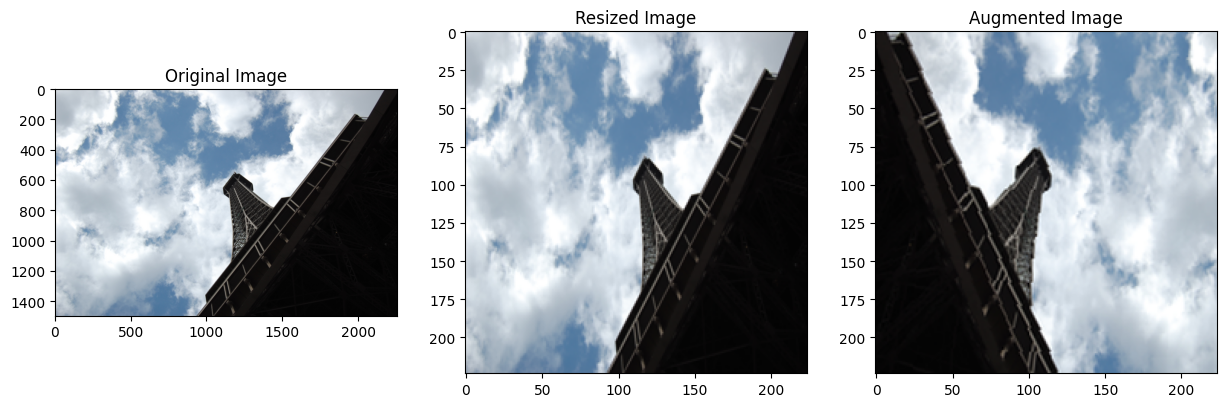

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(image_resized)
axes[1].set_title('Resized Image')
axes[2].imshow(image_augmented)
axes[2].set_title('Augmented Image')

plt.show()